In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API Key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "cities.csv"

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [5]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [6]:
# Print the city count to confirm sufficient count
len(cities)

625

In [7]:
# prep our url and params for our weather call
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"

# set up lists to hold reponse info
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind = []
country = []
name = []
city_count = 1
# Loop through the list of cities and perform a request for data on each
for city in cities:
    query_url = url + 'appid=' + weather_api_key + "&q=" + city + "&units=" + units
    response = requests.get(query_url).json()
    
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])

        print(f"Successfully retrieved all data for city #{city_count} | {city}")
    
    except:
        print(f"Data for city #{city_count} not found")
    city_count += 1
    print("--------------------------------------------------------------")
print("All done grabbing data")

Successfully retrieved all data for city #1 | korla
--------------------------------------------------------------
Successfully retrieved all data for city #2 | at-bashi
--------------------------------------------------------------
Successfully retrieved all data for city #3 | ushuaia
--------------------------------------------------------------
Data for city #4 not found
--------------------------------------------------------------
Successfully retrieved all data for city #5 | mahebourg
--------------------------------------------------------------
Successfully retrieved all data for city #6 | butaritari
--------------------------------------------------------------
Successfully retrieved all data for city #7 | busselton
--------------------------------------------------------------
Successfully retrieved all data for city #8 | ust-nera
--------------------------------------------------------------
Successfully retrieved all data for city #9 | victoria
-----------------------------

Successfully retrieved all data for city #71 | pontianak
--------------------------------------------------------------
Successfully retrieved all data for city #72 | santa cruz
--------------------------------------------------------------
Successfully retrieved all data for city #73 | ferme-neuve
--------------------------------------------------------------
Successfully retrieved all data for city #74 | qasigiannguit
--------------------------------------------------------------
Successfully retrieved all data for city #75 | veraval
--------------------------------------------------------------
Successfully retrieved all data for city #76 | chapais
--------------------------------------------------------------
Successfully retrieved all data for city #77 | hofn
--------------------------------------------------------------
Successfully retrieved all data for city #78 | tilichiki
--------------------------------------------------------------
Successfully retrieved all data for city #

Successfully retrieved all data for city #142 | new norfolk
--------------------------------------------------------------
Successfully retrieved all data for city #143 | kysyl-syr
--------------------------------------------------------------
Successfully retrieved all data for city #144 | batagay-alyta
--------------------------------------------------------------
Successfully retrieved all data for city #145 | plaster rock
--------------------------------------------------------------
Successfully retrieved all data for city #146 | srednekolymsk
--------------------------------------------------------------
Successfully retrieved all data for city #147 | sola
--------------------------------------------------------------
Successfully retrieved all data for city #148 | qaanaaq
--------------------------------------------------------------
Successfully retrieved all data for city #149 | kidal
--------------------------------------------------------------
Successfully retrieved all dat

Successfully retrieved all data for city #213 | la asuncion
--------------------------------------------------------------
Successfully retrieved all data for city #214 | coquimbo
--------------------------------------------------------------
Successfully retrieved all data for city #215 | port-gentil
--------------------------------------------------------------
Successfully retrieved all data for city #216 | birao
--------------------------------------------------------------
Successfully retrieved all data for city #217 | kutum
--------------------------------------------------------------
Data for city #218 not found
--------------------------------------------------------------
Successfully retrieved all data for city #219 | jahazpur
--------------------------------------------------------------
Successfully retrieved all data for city #220 | caala
--------------------------------------------------------------
Successfully retrieved all data for city #221 | tadine
----------------

Successfully retrieved all data for city #282 | springbok
--------------------------------------------------------------
Successfully retrieved all data for city #283 | vicosa
--------------------------------------------------------------
Successfully retrieved all data for city #284 | belyy yar
--------------------------------------------------------------
Successfully retrieved all data for city #285 | port hedland
--------------------------------------------------------------
Successfully retrieved all data for city #286 | thunder bay
--------------------------------------------------------------
Successfully retrieved all data for city #287 | banda aceh
--------------------------------------------------------------
Successfully retrieved all data for city #288 | codrington
--------------------------------------------------------------
Successfully retrieved all data for city #289 | tahta
--------------------------------------------------------------
Successfully retrieved all data 

Successfully retrieved all data for city #352 | pital
--------------------------------------------------------------
Successfully retrieved all data for city #353 | portel
--------------------------------------------------------------
Successfully retrieved all data for city #354 | plouzane
--------------------------------------------------------------
Successfully retrieved all data for city #355 | gornyy
--------------------------------------------------------------
Successfully retrieved all data for city #356 | ponta do sol
--------------------------------------------------------------
Successfully retrieved all data for city #357 | codajas
--------------------------------------------------------------
Successfully retrieved all data for city #358 | mayumba
--------------------------------------------------------------
Successfully retrieved all data for city #359 | eyrarbakki
--------------------------------------------------------------
Successfully retrieved all data for city #3

Successfully retrieved all data for city #421 | wucheng
--------------------------------------------------------------
Successfully retrieved all data for city #422 | yenagoa
--------------------------------------------------------------
Successfully retrieved all data for city #423 | santa isabel
--------------------------------------------------------------
Successfully retrieved all data for city #424 | faanui
--------------------------------------------------------------
Successfully retrieved all data for city #425 | turukhansk
--------------------------------------------------------------
Successfully retrieved all data for city #426 | camargo
--------------------------------------------------------------
Successfully retrieved all data for city #427 | kokopo
--------------------------------------------------------------
Successfully retrieved all data for city #428 | alofi
--------------------------------------------------------------
Successfully retrieved all data for city #42

Successfully retrieved all data for city #492 | sheridan
--------------------------------------------------------------
Successfully retrieved all data for city #493 | daura
--------------------------------------------------------------
Successfully retrieved all data for city #494 | ahuimanu
--------------------------------------------------------------
Successfully retrieved all data for city #495 | kropotkin
--------------------------------------------------------------
Successfully retrieved all data for city #496 | mackay
--------------------------------------------------------------
Successfully retrieved all data for city #497 | choya
--------------------------------------------------------------
Successfully retrieved all data for city #498 | hervey bay
--------------------------------------------------------------
Successfully retrieved all data for city #499 | kungurtug
--------------------------------------------------------------
Successfully retrieved all data for city #50

Successfully retrieved all data for city #561 | mana
--------------------------------------------------------------
Successfully retrieved all data for city #562 | bilma
--------------------------------------------------------------
Successfully retrieved all data for city #563 | syedove
--------------------------------------------------------------
Successfully retrieved all data for city #564 | madang
--------------------------------------------------------------
Successfully retrieved all data for city #565 | hami
--------------------------------------------------------------
Successfully retrieved all data for city #566 | beyneu
--------------------------------------------------------------
Successfully retrieved all data for city #567 | palana
--------------------------------------------------------------
Data for city #568 not found
--------------------------------------------------------------
Successfully retrieved all data for city #569 | hovd
---------------------------------

In [8]:
# Create DF
weather_dict = {"City": name,
               "Latitude": lat,
               "Longitude": long,
               "Max_Temp": max_temp,
               "Humidity": humidity,
               "Cloudiness": cloudiness, 
               "Wind_Speed": wind,
               "Country": country}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country
0,Korla,41.7597,86.1469,54.10,32,12,5.88,CN
1,At-Bashi,41.1702,75.8106,41.14,46,18,6.24,KG
2,Ushuaia,-54.8000,-68.3000,42.80,87,75,3.44,AR
3,Mahébourg,-20.4081,57.7000,77.00,94,75,14.97,MU
4,Butaritari,3.0707,172.7902,82.96,76,88,12.37,KI


<h3>Exporting df to csv </h3>

In [9]:
weather_df.to_csv(output_data_file, index = False)

<h3>Data Analysis and Graphs</h3>

In [10]:
tmp_df = weather_df.loc[weather_df["Humidity"]>100, :]
tmp_df

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country


In [11]:
# No cities over 100% humidity, moving on

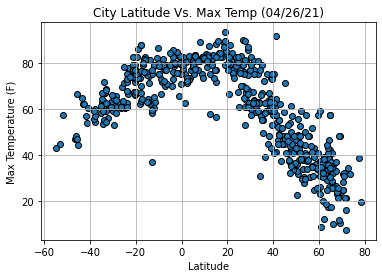

In [47]:
# Scatter for latitude Vs Max Temp
plt.scatter(weather_df['Latitude'], weather_df['Max_Temp'], edgecolor='black')
plt.title("City Latitude Vs. Max Temp (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Plots/Lat_vs_Temp.png")
plt.show()

In [13]:
# This gives us all the max temperature readings (in Fahrenheit) of the cities in our data set by latitude coordinates

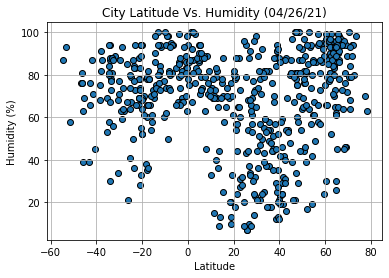

In [48]:
# Scatter for latitude Vs Humidity
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], edgecolor='black')
plt.title("City Latitude Vs. Humidity (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Plots/Lat_vs_Humidity.png")
plt.show()

In [15]:
# This graph shows us the percent of humidity in our city data set by latitude location

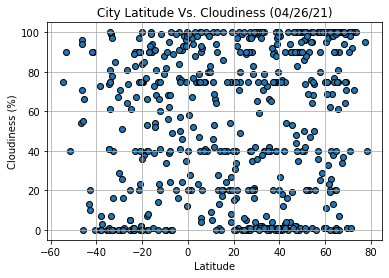

In [49]:
# Scatter for latitude Vs Cloudiness
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], edgecolor='black')
plt.title("City Latitude Vs. Cloudiness (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Plots/Lat_vs_Cloudiness.png")
plt.show()

In [17]:
# This data shows us the percent of cloudiness in our data set for cities by latitude

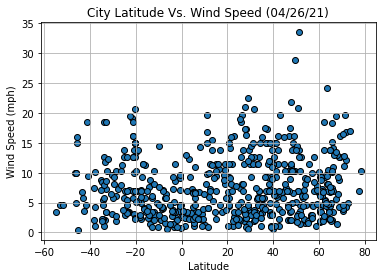

In [50]:
# Scatter for latitude Vs Wind Speed
plt.scatter(weather_df['Latitude'], weather_df['Wind_Speed'], edgecolor='black')
plt.title("City Latitude Vs. Wind Speed (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Plots/Lat_vs_Wind_Speed.png")
plt.show()

In [19]:
# This graph shows us the wind speed (mph) in our city data set by latitude location

<h1>Linear Regression</h1>
<h3>Max Temperature of Cities</h3>

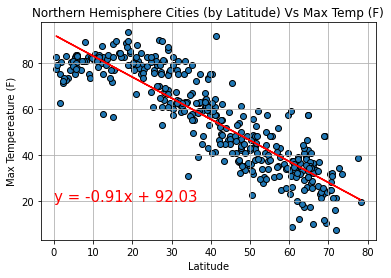

The r-value is: 0.779


In [51]:
# Cities in the Northern Hemisphere
temp_north_hemi_df = weather_df.loc[weather_df["Latitude"]>= 0, :]
x_values = temp_north_hemi_df["Latitude"]
y_values = temp_north_hemi_df["Max_Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere Cities (by Latitude) Vs Max Temp (F)")
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Tempereature (F)')
plt.grid()
plt.savefig("Plots/LinearReg_Lat_vs_Temp(northern hem).png")
plt.show()
print(f"The r-value is: {round(rvalue**2, 3)}")

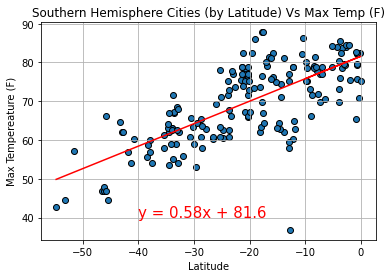

The r-value is: 0.526


In [52]:
# Cities in the Southern Hemisphere
temp_south_hemi_df = weather_df.loc[weather_df["Latitude"] < 0, :]
x_values = temp_south_hemi_df["Latitude"]
y_values = temp_south_hemi_df["Max_Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere Cities (by Latitude) Vs Max Temp (F)")
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Tempereature (F)')
plt.grid()
plt.savefig("Plots/LinearReg_Lat_vs_Temp(southern_hem).png")
plt.show()
print(f"The r-value is: {round(rvalue**2, 3)}")

In [26]:
# For the northern cities we see a strong negative correlation with an r-value at .78 to back it up, and
# with our southern cities we see positive correlation with an r-value of .53.

<h3>Humidity (%) of Cities </h3>

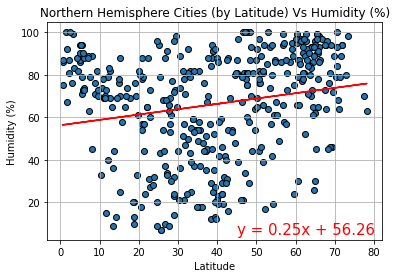

The r-value is: 0.04


In [53]:
# Cities in the Northern Hemisphere
x_values = temp_north_hemi_df["Latitude"]
y_values = temp_north_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere Cities (by Latitude) Vs Humidity (%)")
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("Plots/LinearReg_Lat_vs_Humidity(northern hem).png")
plt.show()
print(f"The r-value is: {round(rvalue**2, 3)}")

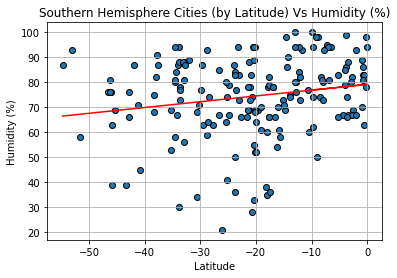

The r-value is: 0.035


In [54]:
# Cities in the Southern Hemisphere
x_values = temp_south_hemi_df["Latitude"]
y_values = temp_south_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere Cities (by Latitude) Vs Humidity (%)")
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("Plots/LinearReg_Lat_vs_Humidity(southern hem).png")
plt.show()
print(f"The r-value is: {round(rvalue**2, 3)}")

In [33]:
# Both northern and southern hemisphere data shows a slight positive correlation in humidity. 
# However, since the r-value is below .10, then the correlation is not strong enough to make any predictions.

<h3>Cloudiness (%) of Cities </h3>

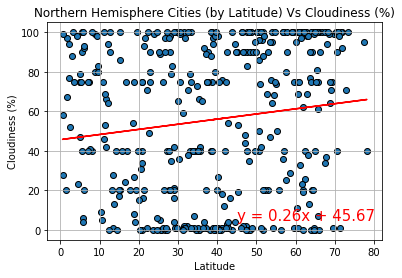

The r-value is: 0.018


In [55]:
# Cities in the Northern Hemisphere
x_values = temp_north_hemi_df["Latitude"]
y_values = temp_north_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere Cities (by Latitude) Vs Cloudiness (%)")
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Plots/LinearReg_Lat_vs_Cloudiness(northern_hem).png")
plt.show()
print(f"The r-value is: {round(rvalue**2, 3)}")

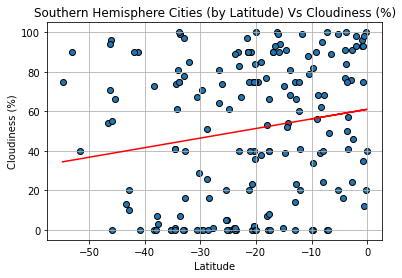

The r-value is: 0.03


In [56]:
# Cities in the Southern Hemisphere
x_values = temp_south_hemi_df["Latitude"]
y_values = temp_south_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere Cities (by Latitude) Vs Cloudiness (%)")
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Plots/LinearReg_Lat_vs_Cloudiness(southern_hem).png")
plt.show()
print(f"The r-value is: {round(rvalue**2, 3)}")

In [42]:
# Both northern and southern hemisphere data shows a slight positive correlation in cloudiness and cities with respect to latitude position. 
# That is, for the northern hemisphere we notice that the further away from the equator the more cloudy cities are, and 
# for the southern hemisphere we notice that the further away south from the equator the less clouds cities have. 
# However, since the r-value is below .10, then the correlation is not strong enough to make any solid predictions.

<h3>Wind Speed of Cities </h3>

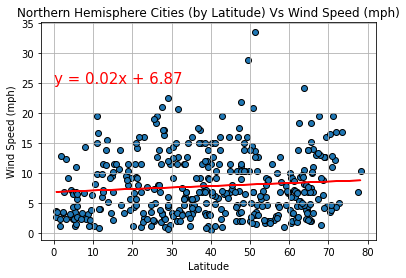

The r-value is: 0.009


In [57]:
# Cities in the Northern Hemisphere
x_values = temp_north_hemi_df["Latitude"]
y_values = temp_north_hemi_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere Cities (by Latitude) Vs Wind Speed (mph)")
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Plots/LinearReg_Lat_vs_Wind_Speed(northern_hem).png")
plt.show()
print(f"The r-value is: {round(rvalue**2, 3)}")

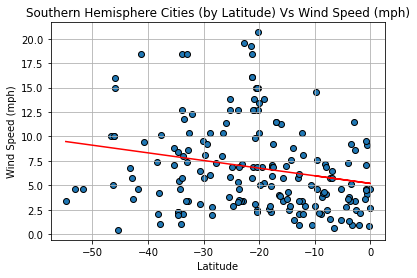

The r-value is: 0.049


In [58]:
# Cities in the Southern Hemisphere
x_values = temp_south_hemi_df["Latitude"]
y_values = temp_south_hemi_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere Cities (by Latitude) Vs Wind Speed (mph)")
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Plots/LinearReg_Lat_vs_Wind_Speed(southern_hem).png")
plt.show()
print(f"The r-value is: {round(rvalue**2, 3)}")

In [59]:
# Looking at both graphs, we notice that the further we are form the equator the higher the wind speed is. 
# However, the correlation r-value is so small that we are not able to use the linear equation to make any solid predictions 

<p> My observations are given after each set of graphs </p>